# <span style = "color:coral"> Customer Behaviour Classification </span>

***

In this project, we will try to predict if the customer purchase the product or not using various machine learning models and Deploy the model with Tkinter library

## Contents

The data represents details about 400 clients of a company including the unique ID, the gender, the age of the customer and the salary. Besides this, we have collected information regarding the buying decision - weather the customer decided to buy specific products or not.

## Let's Begin

### Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'Customer_Behaviour.csv' dataset and store it in a dataframe variable

In [2]:
df = pd.read_csv('Customer_Behaviour.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### View the top 5 rows

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### View info of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


### View basic statistical information about the dataset

In [8]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


### Check for any null values

In [9]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### View unique values in Gender

In [3]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

### Convert male to 0 and Female to 1 in Gender column

In [4]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


#### Drop user ID column

In [6]:
d = df.drop(columns=['User ID'],axis =1,inplace = True)
df

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


## <span style = "color: orange"> Data Visualization </span>

### Plot heatmap to view the correlation between features

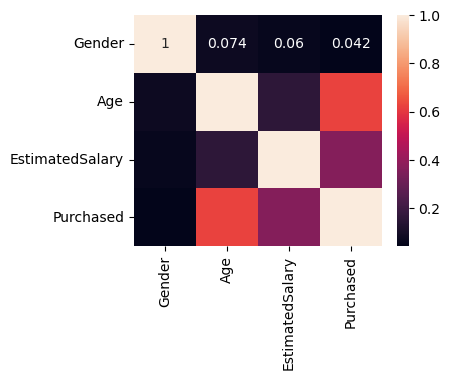

In [14]:
plt.figure(figsize = (4,3))
sns.heatmap(df.corr(), annot = True)
plt.show()

#### Plot a countplot of gender with respect to purchased

In [7]:
df['Gender'] = df['Gender'].astype(str)
df['Purchased'] = df['Purchased'].astype(str)

<Axes: xlabel='Gender', ylabel='count'>

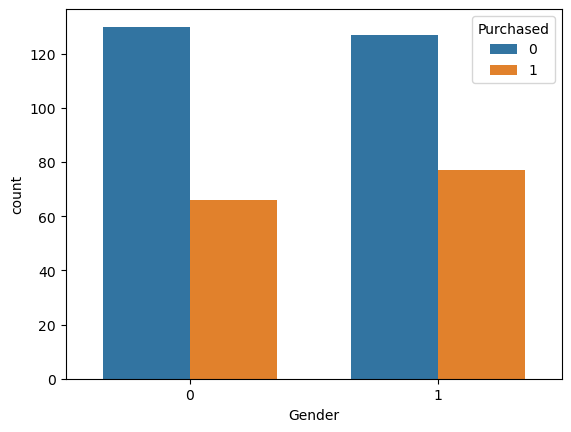

In [16]:
sns.countplot(data = df,x='Gender',hue = 'Purchased',width = 0.7)

### Plot a displot of Age

C:\Users\fmksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


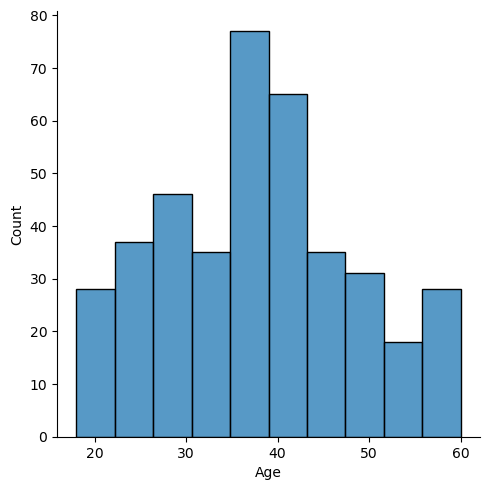

In [15]:
sns.displot(x = 'Age',data = df)

### Plot pairplot of the dataset

C:\Users\fmksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\fmksh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


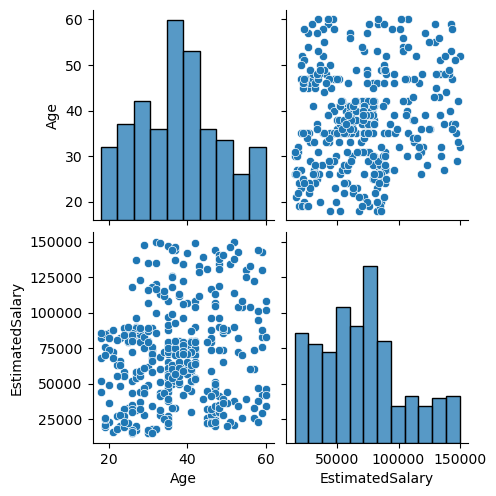

In [16]:
sns.pairplot(df)

## Data Preprocessing

### Split the dataset into input and target variables

In [8]:
X = df.drop(columns =['Purchased'])
y = df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: object

### Scale the data using StandardScaler

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [11]:
xcolumns = X.columns

In [12]:
X = scaler.fit_transform(X)

In [13]:
X = pd.DataFrame(X,columns = xcolumns)

In [14]:
X.head()

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046
1,-1.020204,-0.253587,-1.460681
2,0.980196,-1.113206,-0.785290
3,0.980196,-1.017692,-0.374182
4,-1.020204,-1.781797,0.183751


### Split the dataset into training and testing set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=100)

### Check shape of X_train and X_test

In [26]:
X_train.shape

(300, 3)

In [27]:
X_test.shape

(100, 3)

## ML Models

### Logistic Regression Classifier

In [22]:
from sklearn.linear_model import LogisticRegression
from  sklearn import metrics
from sklearn.model_selection import cross_val_score

In [29]:
model = LogisticRegression()

In [30]:
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
model.score(X_train,y_train)

0.85

In [32]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.87

In [33]:
metrics.confusion_matrix(y_test,y_pred)

array([[62,  3],
       [10, 25]], dtype=int64)

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
model = RandomForestClassifier(n_estimators=20)

In [40]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=20)

In [41]:
model.score(X_train,y_train)

0.9933333333333333

In [35]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_pred,y_test)

0.87

In [36]:
metrics.confusion_matrix(y_pred,y_test)

array([[62, 10],
       [ 3, 25]], dtype=int64)

In [37]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.86      0.91        72
           1       0.71      0.89      0.79        28

    accuracy                           0.87       100
   macro avg       0.83      0.88      0.85       100
weighted avg       0.89      0.87      0.87       100



In [45]:
from sklearn.model_selection import cross_val_score
print(f"Mean of cross validation score is: {cross_val_score(RandomForestClassifier(),X,y,cv=3).mean()}")

Mean of cross validation score is: 0.852448284891333


### Support Vector Machine

In [17]:
from sklearn.svm import SVC

In [18]:
model = SVC()

In [19]:
model.fit(X_train,y_train)

SVC()

In [20]:
model.score(X_train,y_train)

0.9033333333333333

In [23]:
y_pred = model.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.92

In [24]:
metrics.confusion_matrix(y_test,y_pred)

array([[62,  3],
       [ 5, 30]], dtype=int64)

In [25]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        65
           1       0.91      0.86      0.88        35

    accuracy                           0.92       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



In [26]:
print(f"Mean of cross validation score is: {cross_val_score(SVC(),X,y,cv=3).mean()}")

Mean of cross validation score is: 0.9049489395129614


### Assign cross val scores of all models into a dataframe

In [46]:
models = { 'Logistic Regression': LogisticRegression(),'Random Forest': RandomForestClassifier(),'SVC': SVC()}
scores_list = []

for model_name, model in models.items():
    mean_score = cross_val_score(model, X, y, cv=3).mean()
    scores_list.append({'Model': model_name,'Mean Score': mean_score})
scores_df = pd.DataFrame(scores_list)
scores_df

,Model,Mean Score
0,Logistic Regression,0.805072
1,Random Forest,0.862473
2,SVC,0.904949


In [66]:
X.head(1)

,Gender,Age,EstimatedSalary
0,-1.020204,-1.781797,-1.490046


***

## Deploy the model with highest score using Tkinter

In [55]:
### In this case its SVM Classifier

#### Import all modules from Tkinter

In [27]:
from tkinter import *
from tkinter.ttk import Combobox

### Define a function that will output to an entry box in Tkinter

In [30]:
def getprediction():
    Gender1 = Gender.get()
    Age1 = Age.get()
    EstimatedSalary1 = EstimatedSalary.get()
    
   
    if Gender1 == 'Male':
        Gender1 = 0
    else:
        Gender1 = 1
        

    
    data = scaler.transform([[Gender1, Age1, EstimatedSalary1]])
     
    prediction = model.predict(data)

    result.delete(0, END)

    if prediction[0] == 0:
        result.insert(0, 'Purchased')
    else:
        result.insert(0, 'Not Purchased')
   

   # result.insert(0,result)
   

### Create Tkinter window with all necessary entryboxes and labels

In [31]:
window = Tk()
window.title("Customer Behaviour Classification")
window.geometry('400x200')

label = Label(window , text = 'Customer Behaviour Classification:',bg = 'blue', font=('calibre',10, 'bold')).pack()

Genderlabel = Label(window,text ='Gender').pack()
Gender = Combobox(window)
Gender['values']=['Male','Female']
Gender.pack()

Agelabel = Label(window, text = 'Age').pack()
Age = Entry(window)
Age.pack()


EstimatedSalarylabel = Label(window, text = 'EstimatedSalary').pack()
EstimatedSalary = Entry(window)
EstimatedSalary.pack()



button = Button(window, text = 'Get Prediction',command = getprediction).pack()

result = Entry(window)
result.pack()



window.mainloop()

C:\Users\fmksh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\fmksh\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


***

# <span style = "color:green;font-size:40px"> Great Job! </span>